In [ ]:
from google.colab import files
uploaded = files.upload()

Saving weatherHistory.csv to weatherHistory.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

df = pd.read_csv("weatherHistory.csv")
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
print(df.shape, '\n', df.dtypes, '\n', df.isnull().sum())
df = df.dropna(axis=0, how = 'any')

print(df.isnull().sum())
df.shape

(96453, 12) 
 Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object 
 Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64
Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature 

(95936, 12)

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(df['Formatted Date']) 
df['Formatted Date'] = label_encoder.transform(df['Formatted Date']) 

label_encoder2 = preprocessing.LabelEncoder() 
label_encoder2.fit(df['Summary']) 
df['Summary'] = label_encoder2.transform(df['Summary']) 

label_encoder3 = preprocessing.LabelEncoder() 
label_encoder3.fit(df['Precip Type']) 
df['Precip Type'] = label_encoder3.transform(df['Precip Type']) 

label_encoder4 = preprocessing.LabelEncoder() 
label_encoder4.fit(df['Daily Summary']) 
df['Daily Summary'] = label_encoder4.transform(df['Daily Summary']) 

df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2159,19,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,197
1,2160,19,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,197
2,2161,17,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,197
3,2162,19,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,197
4,2163,17,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,197
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,93568,19,0,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,170
96449,93569,19,0,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,170
96450,93570,19,0,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,170
96451,93571,19,0,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,170


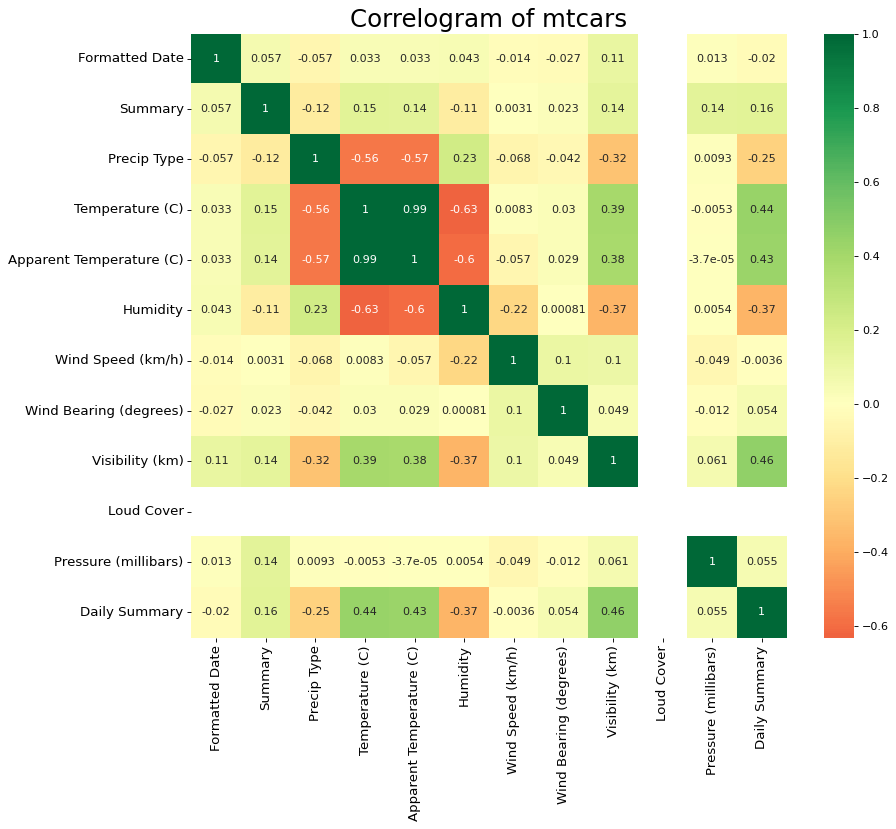

In [ ]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
y = df['Temperature (C)']
x = df.drop(columns='Temperature (C)')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)     

LinearRegression()

In [ ]:
w0 = model.intercept_
w1 = model.coef_
print(w0, w1)

2.6096109701403485 [ 6.92460961e-07  8.20784572e-03  7.16506480e-02  8.72943405e-01
 -1.34738604e+00  8.05122455e-02 -4.20369424e-04  4.32552675e-03
  0.00000000e+00 -2.63517510e-04  7.29796515e-04]


In [ ]:
st = str(w0)
for i in range(8):
  st = st + ' + ' + str(w1[i]) + f' * x{i+1}'
print("y = ", st)

y =  2.6096109701403485 + 6.924609612031408e-07 * x1 + 0.008207845721018556 * x2 + 0.07165064800927921 * x3 + 0.872943404623576 * x4 + -1.3473860413513494 * x5 + 0.0805122454911258 * x6 + -0.00042036942395839993 * x7 + 0.004325526751020558 * x8


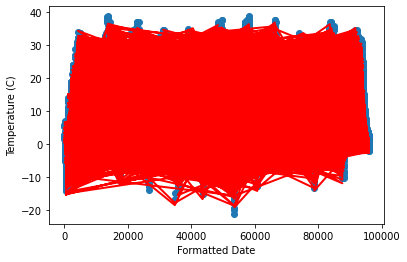

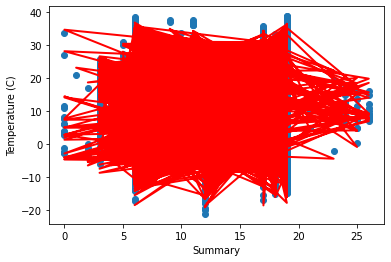

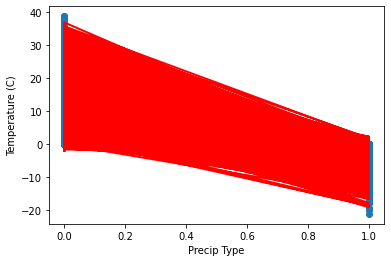

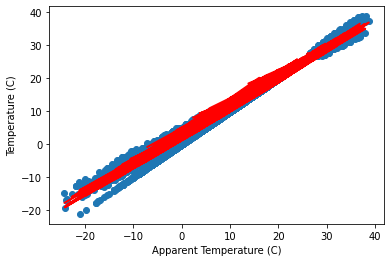

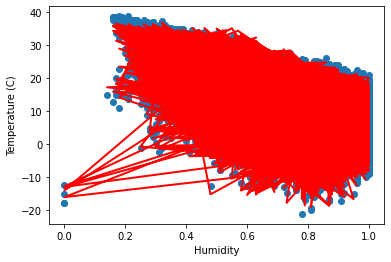

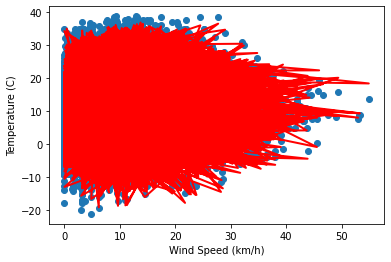

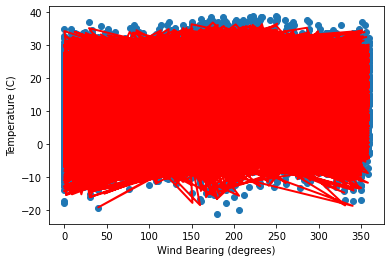

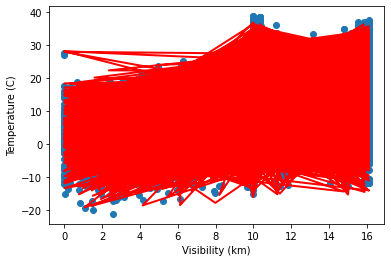

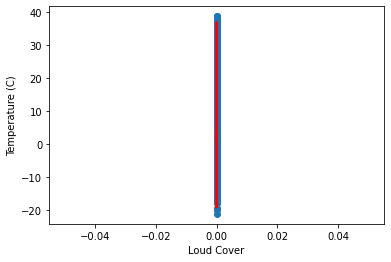

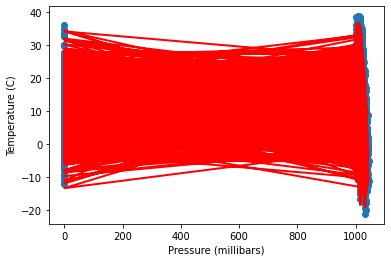

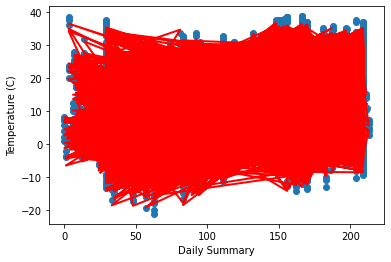

In [ ]:
y_pred = model.predict(X_test)

for col in X_test.columns:
  plt.scatter(X_test[col], y_test)
  plt.plot(X_test[col], y_pred, color='red', linewidth = 2)
  plt.ylabel('Temperature (C)')
  plt.xlabel(col)
  plt.show()

In [ ]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('r2_score:', r2_score(y_test, y_pred))

MAE: 0.7418575627610742
MSE: 0.8998319710897869
r2_score: 0.9902616012825606


In [ ]:
y1 = df['Temperature (C)']
x1 = df[['Apparent Temperature (C)']]
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3)

model1 = LinearRegression()
model1.fit(X1_train, y1_train)    

LinearRegression()

In [ ]:
w01 = model1.intercept_
w11 = model1.coef_
print(w01, w11)

2.3058278543821977 [0.8867773]


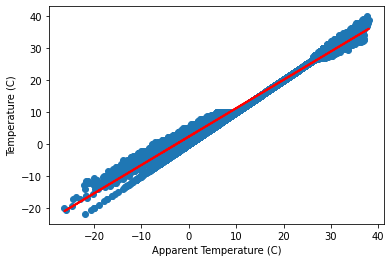

In [ ]:
y_pred12 = model1.predict( X1_test)

plt.scatter(X1_test, y1_test)
plt.plot(X1_test, y_pred12, color='red', linewidth = 2)
plt.ylabel('Temperature (C)')
plt.xlabel('Apparent Temperature (C)')
plt.show()

In [ ]:
print('MAE:', mean_absolute_error(y1_test, y_pred12))
print('MSE:', mean_squared_error(y1_test, y_pred12))
print('r2_score:', r2_score(y1_test, y_pred12))

MAE: 0.8857986158309972
MSE: 1.3451837783276936
r2_score: 0.9853113833538204


Вывод: r2 близок к 1, что означает линия регрессии подогнана к точкам данных и больше изменчивости в у объясняется независимой переменной х, однако MSE >> 0, это плохо